<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
#!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

In [2]:
import urllib.request

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite"
urllib.request.urlretrieve(url, "m4_survey.py")

('m4_survey.py', <http.client.HTTPMessage at 0x2429b49aac0>)

Connect to the database.


In [3]:
import sqlite3

# Specify the path to your SQLite database file
database_file = "m4_survey.py"

# Establish a connection to the SQLite database
connection = sqlite3.connect(database_file)

# Create a cursor object to interact with the database
cursor = connection.cursor()

# Now you can execute SQL queries using the cursor
# For example, you can fetch the names of all tables in the database
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all the table names
table_names = cursor.fetchall()

# Print the table names
print("Table Names:")
for table in table_names:
    print(table[0])

Table Names:
EduOther
DevType
LastInt
JobFactors
WorkPlan
WorkChallenge
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
WebFrameWorkedWith
WebFrameDesireNextYear
MiscTechWorkedWith
MiscTechDesireNextYear
DevEnviron
Containers
SOVisitTo
SONewContent
Gender
Sexuality
Ethnicity
master


Import pandas module.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [5]:
import sqlite3

# Specify the path to your SQLite database file
database_file = "m4_survey.py"

# Establish a connection to the SQLite database
connection = sqlite3.connect(database_file)

# Define your SQL query
QUERY = """
SELECT COUNT(*)
FROM master
"""

# Use pandas to run the SQL query and read the results into a DataFrame
df = pd.read_sql_query(QUERY, connection)

# Print the DataFrame
df

# Close the SQLite connection
#connection.close()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [6]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,connection)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [7]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,connection)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [8]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,connection)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


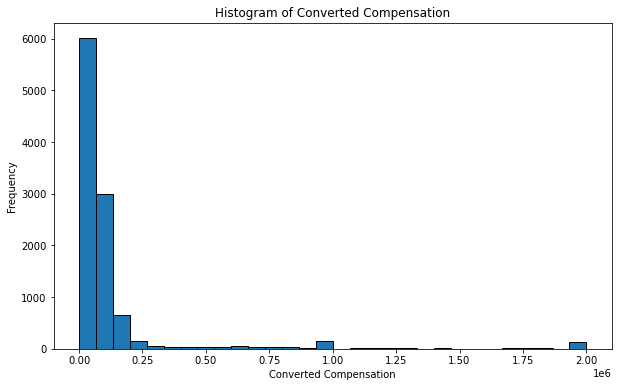

In [9]:
# your code goes here

# Define the SQL query to retrieve the 'ConvertedComp' column:
query_converted_comp = f"SELECT ConvertedComp FROM {table_name};"

# Use pandas to run the SQL query and read the results into a DataFrame:
df_converted_comp = pd.read_sql_query(query_converted_comp, connection)

# Drop any rows with missing values in the 'ConvertedComp' column:
df_converted_comp_cleaned = df_converted_comp.dropna(subset=['ConvertedComp'])

# Plotting the histogram for 'ConvertedComp':
plt.figure(figsize=(10, 6))
plt.hist(df_converted_comp_cleaned['ConvertedComp'], bins=30, edgecolor='black')  # You can adjust the number of bins as needed

# Adding labels and title:
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')

# Show the plot:
plt.show()

### Box Plots


Plot a box plot of `Age.`


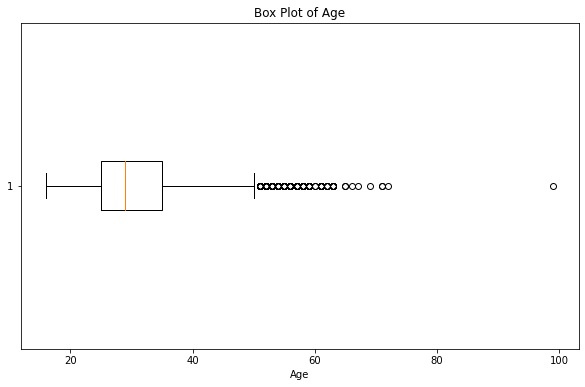

In [10]:
# your code goes here

# Define the SQL query to retrieve the 'Age' column
query_age = f"SELECT Age FROM {table_name};"

# Use pandas to run the SQL query and read the results into a DataFrame
df_age = pd.read_sql_query(query_age, connection)

# Drop any rows with missing values in the 'Age' column
df_age_cleaned = df_age.dropna(subset=['Age'])

# Plotting the box plot for 'Age'
plt.figure(figsize=(10, 6))
plt.boxplot(df_age_cleaned['Age'], vert=False)  # 'vert=False' for a horizontal box plot

# Adding labels and title
plt.title('Box Plot of Age')
plt.xlabel('Age')

# Show the plot
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


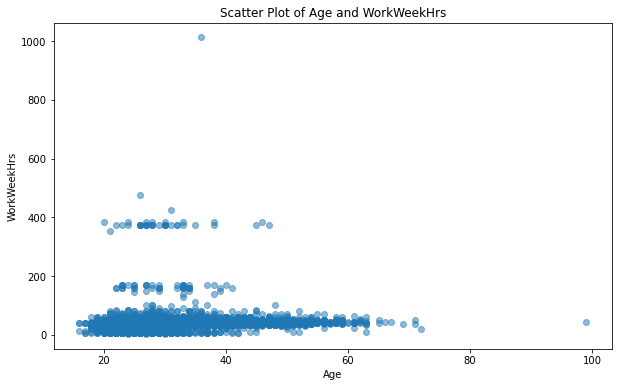

In [11]:
# your code goes here

# Define the SQL query to retrieve the 'Age' and 'WorkWeekHrs' columns:
query_age_workweek = f"SELECT Age, WorkWeekHrs FROM {table_name};"

# Use pandas to run the SQL query and read the results into a DataFrame:
df_age_workweek = pd.read_sql_query(query_age_workweek, connection)

# Drop any rows with missing values in the 'Age' or 'WorkWeekHrs' columns:
df_age_workweek_cleaned = df_age_workweek.dropna(subset=['Age', 'WorkWeekHrs'])

# Plotting the scatter plot for 'Age' and 'WorkWeekHrs':
plt.figure(figsize=(10, 6))
plt.scatter(df_age_workweek_cleaned['Age'], df_age_workweek_cleaned['WorkWeekHrs'], alpha=0.5)

# Adding labels and title:
plt.title('Scatter Plot of Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')

# Show the plot:
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


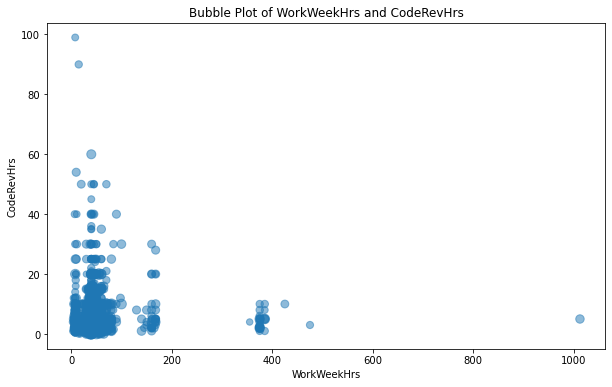

In [12]:
# your code goes here

# Define the SQL query to retrieve the 'WorkWeekHrs', 'CodeRevHrs', and 'Age' columns:
query_hours_age = f"SELECT WorkWeekHrs, CodeRevHrs, Age FROM {table_name};"

# Use pandas to run the SQL query and read the results into a DataFrame:
df_hours_age = pd.read_sql_query(query_hours_age, connection)

# Drop any rows with missing values in the specified columns:
df_hours_age_cleaned = df_hours_age.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])

# Plotting the bubble plot for 'WorkWeekHrs' and 'CodeRevHrs' with 'Age' as bubble size:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_hours_age_cleaned['WorkWeekHrs'],
    df_hours_age_cleaned['CodeRevHrs'],
    s=df_hours_age_cleaned['Age'] * 2,  # Multiply by 2 to scale the bubble size
    alpha=0.5
)

# Adding labels and title:
plt.title('Bubble Plot of WorkWeekHrs and CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')

# Show the plot:
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [13]:
# your code goes here



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


<Figure size 720x432 with 0 Axes>

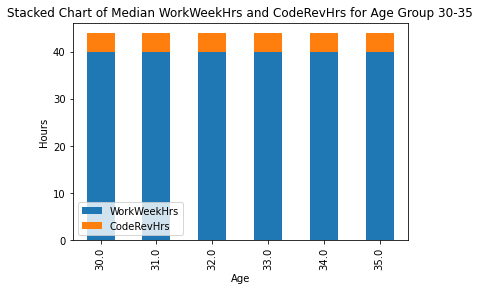

In [14]:
# your code goes here

# Define the SQL query to retrieve the 'WorkWeekHrs', 'CodeRevHrs', and 'Age' columns:
query_hours_age = f"SELECT WorkWeekHrs, CodeRevHrs, Age FROM {table_name};"

# Use pandas to run the SQL query and read the results into a DataFrame:
df_hours_age = pd.read_sql_query(query_hours_age, connection)

# Drop any rows with missing values in the specified columns:
df_hours_age_cleaned = df_hours_age.dropna(subset=['WorkWeekHrs', 'CodeRevHrs', 'Age'])

# Filter the DataFrame for the age group 30 to 35:
df_age_group = df_hours_age_cleaned[(df_hours_age_cleaned['Age'] >= 30) & (df_hours_age_cleaned['Age'] <= 35)]

# Group by 'Age' and calculate the median for 'WorkWeekHrs' and 'CodeRevHrs':
df_median = df_age_group.groupby('Age').median()

# Plotting the stacked chart:
plt.figure(figsize=(10, 6))
df_median[['WorkWeekHrs', 'CodeRevHrs']].plot(kind='bar', stacked=True)

# Adding labels and title:
plt.title('Stacked Chart of Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')
plt.xlabel('Age')
plt.ylabel('Hours')

# Show the plot:
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


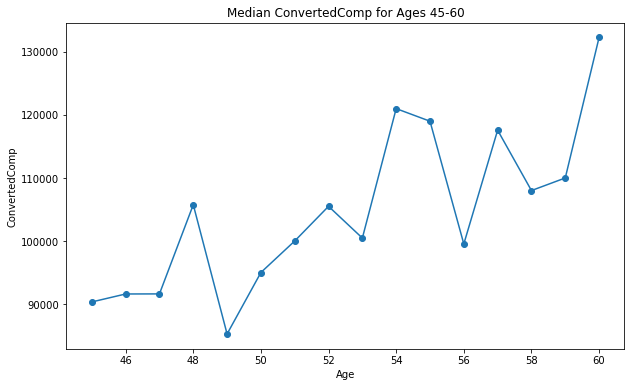

In [15]:
# your code goes here

# Define the SQL query to retrieve the 'ConvertedComp' and 'Age' columns:
query_comp_age = f"SELECT ConvertedComp, Age FROM {table_name};"

# Use pandas to run the SQL query and read the results into a DataFrame:
df_comp_age = pd.read_sql_query(query_comp_age, connection)

# Drop any rows with missing values in the specified columns:
df_comp_age_cleaned = df_comp_age.dropna(subset=['ConvertedComp', 'Age'])

# Filter the DataFrame for ages from 45 to 60:
df_age_group = df_comp_age_cleaned[(df_comp_age_cleaned['Age'] >= 45) & (df_comp_age_cleaned['Age'] <= 60)]

# Group by 'Age' and calculate the median for 'ConvertedComp':
df_median = df_age_group.groupby('Age').median()

# Plotting the line chart:
plt.figure(figsize=(10, 6))
plt.plot(df_median.index, df_median['ConvertedComp'], marker='o', linestyle='-')

# Adding labels and title:
plt.title('Median ConvertedComp for Ages 45-60')
plt.xlabel('Age')
plt.ylabel('ConvertedComp')

# Show the plot:
plt.show()

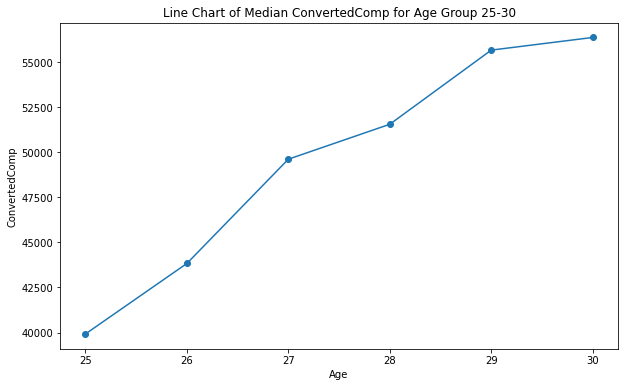

Correlation Coefficient: 0.06271192381694211


In [16]:
# Define the SQL query to retrieve the 'Age' and 'ConvertedComp' columns:
query_age_comp = f"SELECT Age, ConvertedComp FROM {table_name};"

# Use pandas to run the SQL query and read the results into a DataFrame:
df_age_comp = pd.read_sql_query(query_age_comp, connection)

# Drop any rows with missing values in the specified columns:
df_age_comp_cleaned = df_age_comp.dropna(subset=['Age', 'ConvertedComp'])

# Filter the DataFrame for the age group 25-30:
df_age_group = df_age_comp_cleaned[(df_age_comp_cleaned['Age'] >= 25) & (df_age_comp_cleaned['Age'] <= 30)]

# Group by 'Age' and calculate the median for 'ConvertedComp':
df_median = df_age_group.groupby('Age').median()

# Plotting the line chart:
plt.figure(figsize=(10, 6))
plt.plot(df_median.index, df_median['ConvertedComp'], marker='o', linestyle='-')

# Adding labels and title:
plt.title('Line Chart of Median ConvertedComp for Age Group 25-30')
plt.xlabel('Age')
plt.ylabel('ConvertedComp')

# Show the plot:
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = df_age_group['Age'].corr(df_age_group['ConvertedComp'])
print(f"Correlation Coefficient: {correlation_coefficient}")

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


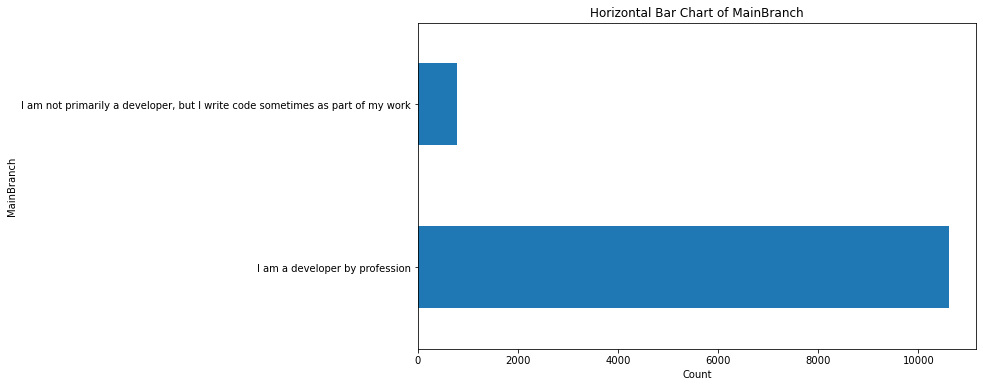

In [17]:
# your code goes here

# Define the SQL query to retrieve the 'MainBranch' column:
query_main_branch = f"SELECT MainBranch FROM {table_name};"

# Use pandas to run the SQL query and read the results into a DataFrame:
df_main_branch = pd.read_sql_query(query_main_branch, connection)

# Plotting the horizontal bar chart:
plt.figure(figsize=(10, 6))
df_main_branch['MainBranch'].value_counts().plot(kind='barh')

# Adding labels and title:
plt.title('Horizontal Bar Chart of MainBranch')
plt.xlabel('Count')
plt.ylabel('MainBranch')

# Show the plot:
plt.show()

Close the database connection.


In [18]:
connection.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
